In [3]:
#IVF 2C
#EPI 在 boundary 富集情况
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
diff_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/IVF_2C_diff_EPgenes.H3K27ac.0.01.txt')
target_genes_80k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_2C_debin_flanking_80k_genes_id.new.txt')
non_target_genes_80k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_2C_debin_flanking_80k_genes_id.non.txt')
target_genes_160k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_2C_debin_flanking_160k_genes_id.new.txt')
non_target_genes_160k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_2C_debin_flanking_160k_genes_id.non.txt')
target_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_2C_debin_genes_id.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_2C_debin_genes_id.non.txt')

# 运行富集分析
p_value = enrichment_analysis(diff_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)
p_value_80k = enrichment_analysis(diff_genes, target_genes_80k, non_target_genes_80k)
#print("p-value for ±80k flanking regions:", p_value_80k)
p_value_160k = enrichment_analysis(diff_genes, target_genes_160k, non_target_genes_160k)
#print("p-value for ±160k flanking regions:", p_value_160k)

# 计算重叠比例
target_overlap_proportion_80k = calculate_overlap_proportion(diff_genes, target_genes_80k)
non_target_overlap_proportion_80k = calculate_overlap_proportion(diff_genes, non_target_genes_80k)
target_overlap_proportion_160k = calculate_overlap_proportion(diff_genes, target_genes_160k)
non_target_overlap_proportion_160k = calculate_overlap_proportion(diff_genes, non_target_genes_160k)
target_overlap_proportion = calculate_overlap_proportion(diff_genes, target_genes)
non_target_overlap_proportion = calculate_overlap_proportion(diff_genes, non_target_genes)

# 创建柱状图
overlap_proportions = [target_overlap_proportion, non_target_overlap_proportion,
                       target_overlap_proportion_80k, non_target_overlap_proportion_80k, 
                       target_overlap_proportion_160k, non_target_overlap_proportion_160k]

print(overlap_proportions)

[[259, 5480], [560, 15257]]
[[1079, 4660], [2540, 13277]]
[[1739, 4000], [4278, 11539]]
[0.3162393162393162, 0.2642619472440565, 0.29814865985078753, 0.25979818252773595, 0.2890144590327406, 0.2574168221893301]


Table 1: p-value = 0.001247
Table 2: p-value = 0.000003
Table 3: p-value = 0.000003


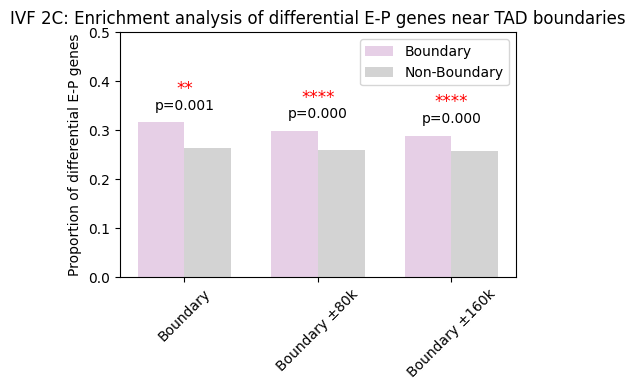

In [4]:
#IVF 2C
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

plt.figure(figsize=(13, 4))

# 构造x轴刻度标签、数据
labels = ['Boundary', 'Boundary ±80k', 'Boundary ±160k']
first = [target_overlap_proportion, target_overlap_proportion_80k, target_overlap_proportion_160k]  # percentages as floats (without % sign)
second = [non_target_overlap_proportion, non_target_overlap_proportion_80k, non_target_overlap_proportion_160k]  # percentages as floats (without % sign)


# Three contingency tables
contingency_tables = [
    [[259, 5480], [560, 15257]],
    [[1079, 4660], [2540, 13277]],
    [[1739, 4000], [4278, 11539]]
]

# Calculate p-values for each table
p_values = []
for table in contingency_tables:
    odds_ratio, p_value = fisher_exact(table)
    p_values.append(p_value)

# Print or use the p-values as needed
for i, p_value in enumerate(p_values):
    print(f"Table {i+1}: p-value = {p_value:.6f}")

# 两组数据
plt.subplot(131)
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.35  # 柱子的宽度，调整为合适的宽度

# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
bars1 = plt.bar(x - width/2, first, width, label='Boundary', color='#e6cfe6')
bars2 = plt.bar(x + width/2, second, width, label='Non-Boundary', color='lightgrey')

plt.ylabel('Proportion of differential E-P genes')
plt.title('IVF 2C: Enrichment analysis of differential E-P genes near TAD boundaries')
plt.xticks(x, labels, rotation=45)

# 设置y轴范围和y轴刻度
plt.ylim(0, 0.5)

# Annotate p-values on top of each group of bars and mark significance with stars based on conditions
for i, p_value in enumerate(p_values):
    # Add p-value text
    plt.text(i, max(first[i], second[i]) + 0.02, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=10)
    
    # Check condition: boundary proportion > non-boundary proportion and significant p-value
    if first[i] > second[i] and p_value <= 0.05:
        # Mark significance with stars based on p-value
        if p_value <= 1.00e-04:
            plt.text(i, max(first[i], second[i]) + 0.05, '****', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-03:
            plt.text(i, max(first[i], second[i]) + 0.05, '***', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '**', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 5.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '*', ha='center', va='bottom', fontsize=12, color='red')

plt.legend()
plt.tight_layout()  # 调整布局，防止标签重叠
plt.savefig('IVF_2C_EPI_enrich_TADboundary.svg', dpi=300, bbox_inches='tight', transparent=True)

In [6]:
#IVF 4C
#EPI 在 boundary 富集情况
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
diff_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/IVF_4C_diff_EPgenes.H3K27ac.0.01.txt')
target_genes_80k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_4C_debin_flanking_80k_genes_id.new.txt')
non_target_genes_80k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_4C_debin_flanking_80k_genes_id.non.txt')
target_genes_160k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_4C_debin_flanking_160k_genes_id.new.txt')
non_target_genes_160k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_4C_debin_flanking_160k_genes_id.non.txt')
target_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_4C_debin_genes_id.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_4C_debin_genes_id.non.txt')

# 运行富集分析
p_value = enrichment_analysis(diff_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)
p_value_80k = enrichment_analysis(diff_genes, target_genes_80k, non_target_genes_80k)
#print("p-value for ±80k flanking regions:", p_value_80k)
p_value_160k = enrichment_analysis(diff_genes, target_genes_160k, non_target_genes_160k)
#print("p-value for ±160k flanking regions:", p_value_160k)

# 计算重叠比例
target_overlap_proportion_80k = calculate_overlap_proportion(diff_genes, target_genes_80k)
non_target_overlap_proportion_80k = calculate_overlap_proportion(diff_genes, non_target_genes_80k)
target_overlap_proportion_160k = calculate_overlap_proportion(diff_genes, target_genes_160k)
non_target_overlap_proportion_160k = calculate_overlap_proportion(diff_genes, non_target_genes_160k)
target_overlap_proportion = calculate_overlap_proportion(diff_genes, target_genes)
non_target_overlap_proportion = calculate_overlap_proportion(diff_genes, non_target_genes)

# 创建柱状图
overlap_proportions = [target_overlap_proportion, non_target_overlap_proportion,
                       target_overlap_proportion_80k, non_target_overlap_proportion_80k, 
                       target_overlap_proportion_160k, non_target_overlap_proportion_160k]

print(overlap_proportions)

[[248, 5781], [719, 15992]]
[[1160, 4869], [3073, 13638]]
[[1922, 4107], [4989, 11722]]
[0.2564632885211996, 0.26551233178707573, 0.27403732577368295, 0.263089641757173, 0.27810736507017797, 0.25946048392191545]


Table 1: p-value = 0.551512
Table 2: p-value = 0.147777
Table 3: p-value = 0.003463


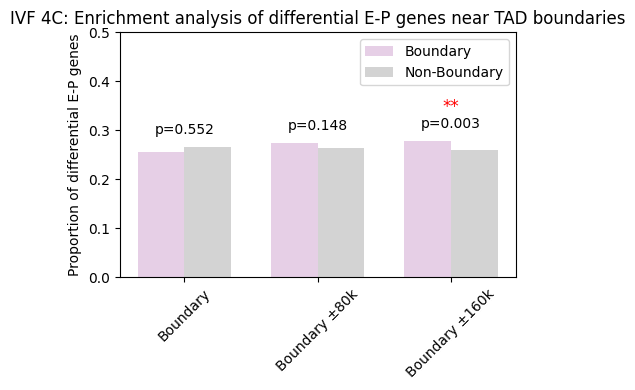

In [7]:
#IVF 4C
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

plt.figure(figsize=(13, 4))

# 构造x轴刻度标签、数据
labels = ['Boundary', 'Boundary ±80k', 'Boundary ±160k']
first = [target_overlap_proportion, target_overlap_proportion_80k, target_overlap_proportion_160k]  # percentages as floats (without % sign)
second = [non_target_overlap_proportion, non_target_overlap_proportion_80k, non_target_overlap_proportion_160k]  # percentages as floats (without % sign)


# Three contingency tables
contingency_tables = [
    [[248, 5781], [719, 15992]],
    [[1160, 4869], [3073, 13638]],
    [[1922, 4107], [4989, 11722]]
]

# Calculate p-values for each table
p_values = []
for table in contingency_tables:
    odds_ratio, p_value = fisher_exact(table)
    p_values.append(p_value)

# Print or use the p-values as needed
for i, p_value in enumerate(p_values):
    print(f"Table {i+1}: p-value = {p_value:.6f}")

# 两组数据
plt.subplot(131)
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.35  # 柱子的宽度，调整为合适的宽度

# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
bars1 = plt.bar(x - width/2, first, width, label='Boundary', color='#e6cfe6')
bars2 = plt.bar(x + width/2, second, width, label='Non-Boundary', color='lightgrey')

plt.ylabel('Proportion of differential E-P genes')
plt.title('IVF 4C: Enrichment analysis of differential E-P genes near TAD boundaries')
plt.xticks(x, labels, rotation=45)

# 设置y轴范围和y轴刻度
plt.ylim(0, 0.5)

# Annotate p-values on top of each group of bars and mark significance with stars based on conditions
for i, p_value in enumerate(p_values):
    # Add p-value text
    plt.text(i, max(first[i], second[i]) + 0.02, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=10)
    
    # Check condition: boundary proportion > non-boundary proportion and significant p-value
    if first[i] > second[i] and p_value <= 0.05:
        # Mark significance with stars based on p-value
        if p_value <= 1.00e-04:
            plt.text(i, max(first[i], second[i]) + 0.05, '****', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-03:
            plt.text(i, max(first[i], second[i]) + 0.05, '***', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '**', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 5.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '*', ha='center', va='bottom', fontsize=12, color='red')

plt.legend()
plt.tight_layout()  # 调整布局，防止标签重叠
plt.savefig('IVF_4C_EPI_enrich_TADboundary.svg', dpi=300, bbox_inches='tight', transparent=True)

In [14]:
#PA 2C
#PA 2C inter-blastomere genes 获取列联表
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
diff_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/PA_2C_diff_EPgenes.H3K27ac.0.01.txt')
target_genes_80k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_PA_2C_debin_flanking_80k_genes_id.new.txt')
non_target_genes_80k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_PA_2C_debin_flanking_80k_genes_id.non.txt')
target_genes_160k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_PA_2C_debin_flanking_160k_genes_id.new.txt')
non_target_genes_160k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_PA_2C_debin_flanking_160k_genes_id.non.txt')
target_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_PA_2C_debin_genes_id.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_PA_2C_debin_genes_id.non.txt')

# 运行富集分析
p_value = enrichment_analysis(diff_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)
p_value_80k = enrichment_analysis(diff_genes, target_genes_80k, non_target_genes_80k)
#print("p-value for ±80k flanking regions:", p_value_80k)
p_value_160k = enrichment_analysis(diff_genes, target_genes_160k, non_target_genes_160k)
#print("p-value for ±160k flanking regions:", p_value_160k)

# 计算重叠比例
target_overlap_proportion_80k = calculate_overlap_proportion(diff_genes, target_genes_80k)
non_target_overlap_proportion_80k = calculate_overlap_proportion(diff_genes, non_target_genes_80k)
target_overlap_proportion_160k = calculate_overlap_proportion(diff_genes, target_genes_160k)
non_target_overlap_proportion_160k = calculate_overlap_proportion(diff_genes, non_target_genes_160k)
target_overlap_proportion = calculate_overlap_proportion(diff_genes, target_genes)
non_target_overlap_proportion = calculate_overlap_proportion(diff_genes, non_target_genes)

# 创建柱状图
categories = ['2C Boundary', '2C Non-Boundary', '2C Boundary ± 80k', '2C Non-Boundary ± 80k', '2C Boundary ± 160k', '2C Non-Boundary ± 160k']
overlap_proportions = [target_overlap_proportion, non_target_overlap_proportion,
                       target_overlap_proportion_80k, non_target_overlap_proportion_80k, 
                       target_overlap_proportion_160k, non_target_overlap_proportion_160k]

x = range(len(categories))
print(overlap_proportions)

[[136, 5343], [460, 15617]]
[[647, 4832], [1930, 14147]]
[[1115, 4364], [3233, 12844]]
[0.22818791946308725, 0.25491412213740455, 0.25106713232440825, 0.25459718636387585, 0.2564397424103036, 0.2536029753602975]


Table 1: p-value = 0.152265
Table 2: p-value = 0.717636
Table 3: p-value = 0.711123


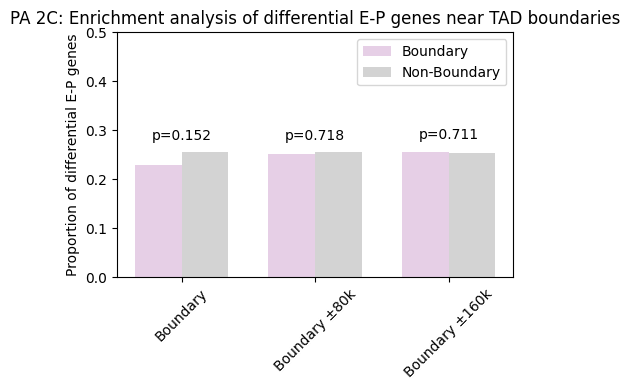

In [15]:
#PA 2C
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

plt.figure(figsize=(13, 4))

# 构造x轴刻度标签、数据
labels = ['Boundary', 'Boundary ±80k', 'Boundary ±160k']
first = [target_overlap_proportion, target_overlap_proportion_80k, target_overlap_proportion_160k]  # percentages as floats (without % sign)
second = [non_target_overlap_proportion, non_target_overlap_proportion_80k, non_target_overlap_proportion_160k]  # percentages as floats (without % sign)


# Three contingency tables
contingency_tables = [
    [[136, 5343], [460, 15617]],
    [[647, 4832], [1930, 14147]],
    [[1115, 4364], [3233, 12844]]
]

# Calculate p-values for each table
p_values = []
for table in contingency_tables:
    odds_ratio, p_value = fisher_exact(table)
    p_values.append(p_value)

# Print or use the p-values as needed
for i, p_value in enumerate(p_values):
    print(f"Table {i+1}: p-value = {p_value:.6f}")

# 两组数据
plt.subplot(131)
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.35  # 柱子的宽度，调整为合适的宽度

# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
bars1 = plt.bar(x - width/2, first, width, label='Boundary', color='#e6cfe6')
bars2 = plt.bar(x + width/2, second, width, label='Non-Boundary', color='lightgrey')

plt.ylabel('Proportion of differential E-P genes')
plt.title('PA 2C: Enrichment analysis of differential E-P genes near TAD boundaries')
plt.xticks(x, labels, rotation=45)

# 设置y轴范围和y轴刻度
plt.ylim(0, 0.5)

# Annotate p-values on top of each group of bars and mark significance with stars based on conditions
for i, p_value in enumerate(p_values):
    # Add p-value text
    plt.text(i, max(first[i], second[i]) + 0.02, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=10)
    
    # Check condition: boundary proportion > non-boundary proportion and significant p-value
    if first[i] > second[i] and p_value <= 0.05:
        # Mark significance with stars based on p-value
        if p_value <= 1.00e-04:
            plt.text(i, max(first[i], second[i]) + 0.05, '****', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-03:
            plt.text(i, max(first[i], second[i]) + 0.05, '***', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '**', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 5.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '*', ha='center', va='bottom', fontsize=12, color='red')

plt.legend()
plt.tight_layout()  # 调整布局，防止标签重叠
plt.savefig('PA_2C_EPI_enrich_TADboundary.svg', dpi=300, bbox_inches='tight', transparent=True)

In [16]:
#PA 4C
#PA 4C inter-blastomere genes 获取列联表
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
diff_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/PA_4C_diff_EPgenes.H3K27ac.0.01.txt')
target_genes_80k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_PA_4C_debin_flanking_80k_genes_id.new.txt')
non_target_genes_80k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_PA_4C_debin_flanking_80k_genes_id.non.txt')
target_genes_160k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_PA_4C_debin_flanking_160k_genes_id.new.txt')
non_target_genes_160k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_PA_4C_debin_flanking_160k_genes_id.non.txt')
target_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_PA_4C_debin_genes_id.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_PA_4C_debin_genes_id.non.txt')

# 运行富集分析
p_value = enrichment_analysis(diff_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)
p_value_80k = enrichment_analysis(diff_genes, target_genes_80k, non_target_genes_80k)
#print("p-value for ±80k flanking regions:", p_value_80k)
p_value_160k = enrichment_analysis(diff_genes, target_genes_160k, non_target_genes_160k)
#print("p-value for ±160k flanking regions:", p_value_160k)

# 计算重叠比例
target_overlap_proportion_80k = calculate_overlap_proportion(diff_genes, target_genes_80k)
non_target_overlap_proportion_80k = calculate_overlap_proportion(diff_genes, non_target_genes_80k)
target_overlap_proportion_160k = calculate_overlap_proportion(diff_genes, target_genes_160k)
non_target_overlap_proportion_160k = calculate_overlap_proportion(diff_genes, non_target_genes_160k)
target_overlap_proportion = calculate_overlap_proportion(diff_genes, target_genes)
non_target_overlap_proportion = calculate_overlap_proportion(diff_genes, non_target_genes)

# 创建柱状图
categories = ['2C Boundary', '2C Non-Boundary', '2C Boundary ± 80k', '2C Non-Boundary ± 80k', '2C Boundary ± 160k', '2C Non-Boundary ± 160k']
overlap_proportions = [target_overlap_proportion, non_target_overlap_proportion,
                       target_overlap_proportion_80k, non_target_overlap_proportion_80k, 
                       target_overlap_proportion_160k, non_target_overlap_proportion_160k]

x = range(len(categories))
print(overlap_proportions)

[[327, 5151], [1003, 16259]]
[[1389, 4089], [4096, 13166]]
[[2173, 3305], [6358, 10904]]
[0.24586466165413534, 0.24058851004203644, 0.253236098450319, 0.23697478991596638, 0.25471808697690773, 0.23259905693574495]


Table 1: p-value = 0.667540
Table 2: p-value = 0.014420
Table 3: p-value = 0.000167


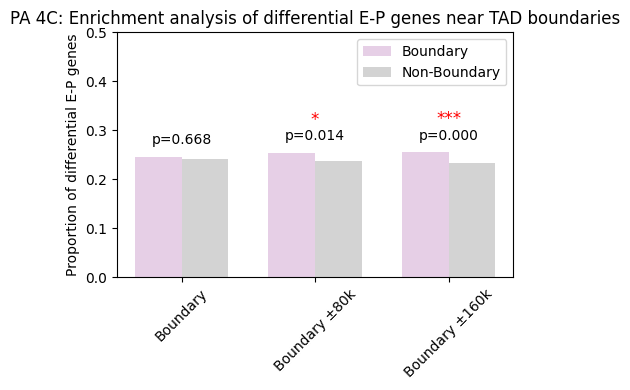

In [17]:
#PA 4C
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

plt.figure(figsize=(13, 4))

# 构造x轴刻度标签、数据
labels = ['Boundary', 'Boundary ±80k', 'Boundary ±160k']
first = [target_overlap_proportion, target_overlap_proportion_80k, target_overlap_proportion_160k]  # percentages as floats (without % sign)
second = [non_target_overlap_proportion, non_target_overlap_proportion_80k, non_target_overlap_proportion_160k]  # percentages as floats (without % sign)


# Three contingency tables
contingency_tables = [
    [[327, 5151], [1003, 16259]],
    [[1389, 4089], [4096, 13166]],
    [[2173, 3305], [6358, 10904]]
]

# Calculate p-values for each table
p_values = []
for table in contingency_tables:
    odds_ratio, p_value = fisher_exact(table)
    p_values.append(p_value)

# Print or use the p-values as needed
for i, p_value in enumerate(p_values):
    print(f"Table {i+1}: p-value = {p_value:.6f}")

# 两组数据
plt.subplot(131)
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.35  # 柱子的宽度，调整为合适的宽度

# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
bars1 = plt.bar(x - width/2, first, width, label='Boundary', color='#e6cfe6')
bars2 = plt.bar(x + width/2, second, width, label='Non-Boundary', color='lightgrey')

plt.ylabel('Proportion of differential E-P genes')
plt.title('PA 4C: Enrichment analysis of differential E-P genes near TAD boundaries')
plt.xticks(x, labels, rotation=45)

# 设置y轴范围和y轴刻度
plt.ylim(0, 0.5)

# Annotate p-values on top of each group of bars and mark significance with stars based on conditions
for i, p_value in enumerate(p_values):
    # Add p-value text
    plt.text(i, max(first[i], second[i]) + 0.02, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=10)
    
    # Check condition: boundary proportion > non-boundary proportion and significant p-value
    if first[i] > second[i] and p_value <= 0.05:
        # Mark significance with stars based on p-value
        if p_value <= 1.00e-04:
            plt.text(i, max(first[i], second[i]) + 0.05, '****', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-03:
            plt.text(i, max(first[i], second[i]) + 0.05, '***', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 1.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '**', ha='center', va='bottom', fontsize=12, color='red')
        elif p_value <= 5.00e-02:
            plt.text(i, max(first[i], second[i]) + 0.05, '*', ha='center', va='bottom', fontsize=12, color='red')

plt.legend()
plt.tight_layout()  # 调整布局，防止标签重叠
plt.savefig('PA_4C_EPI_enrich_TADboundary.svg', dpi=300, bbox_inches='tight', transparent=True)

In [12]:
#IVF 2C inter-blastomere genes 获取列联表
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
diff_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/ivf_2c_dipid.txt')
target_genes_80k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_2C_debin_flanking_80k_genes_id.new.txt')
non_target_genes_80k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_2C_debin_flanking_80k_genes_id.non.txt')
target_genes_160k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_2C_debin_flanking_160k_genes_id.new.txt')
non_target_genes_160k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_2C_debin_flanking_160k_genes_id.non.txt')
target_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_2C_debin_genes_id.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_2C_debin_genes_id.non.txt')

# 运行富集分析
p_value = enrichment_analysis(diff_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)
p_value_80k = enrichment_analysis(diff_genes, target_genes_80k, non_target_genes_80k)
#print("p-value for ±80k flanking regions:", p_value_80k)
p_value_160k = enrichment_analysis(diff_genes, target_genes_160k, non_target_genes_160k)
#print("p-value for ±160k flanking regions:", p_value_160k)

# 计算重叠比例
target_overlap_proportion_80k = calculate_overlap_proportion(diff_genes, target_genes_80k)
non_target_overlap_proportion_80k = calculate_overlap_proportion(diff_genes, non_target_genes_80k)
target_overlap_proportion_160k = calculate_overlap_proportion(diff_genes, target_genes_160k)
non_target_overlap_proportion_160k = calculate_overlap_proportion(diff_genes, non_target_genes_160k)
target_overlap_proportion = calculate_overlap_proportion(diff_genes, target_genes)
non_target_overlap_proportion = calculate_overlap_proportion(diff_genes, non_target_genes)

# 创建柱状图
categories = ['2C Boundary', '2C Non-Boundary', '2C Boundary ± 80k', '2C Non-Boundary ± 80k', '2C Boundary ± 160k', '2C Non-Boundary ± 160k']
overlap_proportions = [target_overlap_proportion, non_target_overlap_proportion,
                       target_overlap_proportion_80k, non_target_overlap_proportion_80k, 
                       target_overlap_proportion_160k, non_target_overlap_proportion_160k]

x = range(len(categories))


[[24, 673], [795, 20064]]
[[108, 589], [3511, 17348]]
[[179, 518], [5838, 15021]]


Table 1: p-value = 0.687474
Table 2: p-value = 0.381157
Table 3: p-value = 0.197795


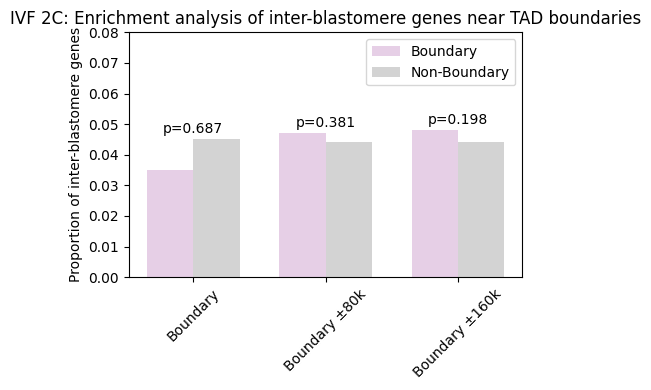

In [13]:
#IVF 2C画图 inter-blastomere 画图
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact

plt.figure(figsize=(13, 4))

# 构造x轴刻度标签、数据
labels = ['Boundary', 'Boundary ±80k', 'Boundary ±160k']
first = [0.035, 0.047, 0.048]  # percentages as floats (without % sign)
second = [0.045, 0.044, 0.044]  # percentages as floats (without % sign)

# Three contingency tables
contingency_tables = [
    [[24, 673], [795, 20064]],
    [[108, 589], [3511, 17348]],
    [[179, 518], [5838, 15021]]
]

# Calculate p-values for each table
p_values = []
for table in contingency_tables:
    odds_ratio, p_value = fisher_exact(table)
    p_values.append(p_value)

# Print or use the p-values as needed
for i, p_value in enumerate(p_values):
    print(f"Table {i+1}: p-value = {p_value:.6f}")

# 两组数据
plt.subplot(131)
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.35  # 柱子的宽度，调整为合适的宽度

# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
bars1 = plt.bar(x - width/2, first, width, label='Boundary', color='#e6cfe6')
bars2 = plt.bar(x + width/2, second, width, label='Non-Boundary', color='lightgrey')

plt.ylabel('Proportion of inter-blastomere genes')
plt.title('IVF 2C: Enrichment analysis of inter-blastomere genes near TAD boundaries')
plt.xticks(x, labels, rotation=45)

# 设置y轴范围和y轴刻度
plt.ylim(0, 0.08)

# Annotate p-values on top of each group of bars
for i, p_value in enumerate(p_values):
    plt.text(i, max(first[i], second[i]) + 0.001, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=10)

plt.legend()
plt.tight_layout()  # 调整布局，防止标签重叠
plt.show()


In [14]:
#IVF 4C inter-blastomere genes 获取列联表
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
diff_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/ivf_4c_dipid.txt')
target_genes_80k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_4C_debin_flanking_80k_genes_id.new.txt')
non_target_genes_80k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_4C_debin_flanking_80k_genes_id.non.txt')
target_genes_160k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_4C_debin_flanking_160k_genes_id.new.txt')
non_target_genes_160k = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_4C_debin_flanking_160k_genes_id.non.txt')
target_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_4C_debin_genes_id.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/deDoc2-main/PA_40k_TAD_cat/2c_4c_subtad/boundary_frequency/dedoc2_IVF_4C_debin_genes_id.non.txt')

# 运行富集分析
p_value = enrichment_analysis(diff_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)
p_value_80k = enrichment_analysis(diff_genes, target_genes_80k, non_target_genes_80k)
#print("p-value for ±80k flanking regions:", p_value_80k)
p_value_160k = enrichment_analysis(diff_genes, target_genes_160k, non_target_genes_160k)
#print("p-value for ±160k flanking regions:", p_value_160k)

# 计算重叠比例
target_overlap_proportion_80k = calculate_overlap_proportion(diff_genes, target_genes_80k)
non_target_overlap_proportion_80k = calculate_overlap_proportion(diff_genes, non_target_genes_80k)
target_overlap_proportion_160k = calculate_overlap_proportion(diff_genes, target_genes_160k)
non_target_overlap_proportion_160k = calculate_overlap_proportion(diff_genes, non_target_genes_160k)
target_overlap_proportion = calculate_overlap_proportion(diff_genes, target_genes)
non_target_overlap_proportion = calculate_overlap_proportion(diff_genes, non_target_genes)

# 创建柱状图
categories = ['2C Boundary', '2C Non-Boundary', '2C Boundary ± 80k', '2C Non-Boundary ± 80k', '2C Boundary ± 160k', '2C Non-Boundary ± 160k']
overlap_proportions = [target_overlap_proportion, non_target_overlap_proportion,
                       target_overlap_proportion_80k, non_target_overlap_proportion_80k, 
                       target_overlap_proportion_160k, non_target_overlap_proportion_160k]

x = range(len(categories))


[[86, 2030], [881, 19743]]
[[390, 1726], [3843, 16781]]
[[639, 1477], [6272, 14352]]


Table 1: p-value = 0.692253
Table 2: p-value = 0.837395
Table 3: p-value = 0.862100


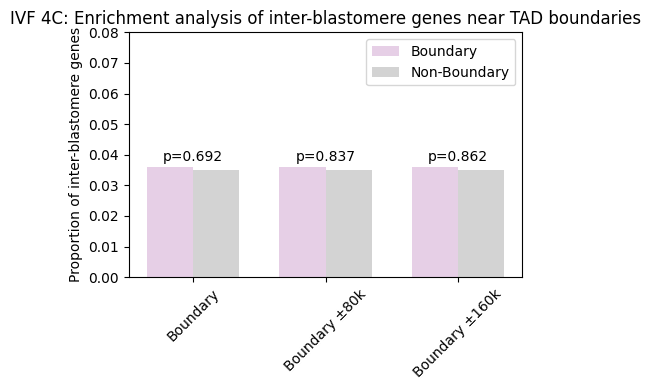

In [15]:
#IVF 4C画图 inter-blastomere 画图
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import fisher_exact

plt.figure(figsize=(13, 4))

# 构造x轴刻度标签、数据
labels = ['Boundary', 'Boundary ±80k', 'Boundary ±160k']
first = [0.036, 0.036, 0.036]  # percentages as floats (without % sign)
second = [0.035, 0.035, 0.035]  # percentages as floats (without % sign)

# Three contingency tables
contingency_tables = [
    [[86, 2030], [881, 19743]],
    [[390, 1726], [3843, 16781]],
    [[639, 1477], [6272, 14352]]
]

# Calculate p-values for each table
p_values = []
for table in contingency_tables:
    odds_ratio, p_value = fisher_exact(table)
    p_values.append(p_value)

# Print or use the p-values as needed
for i, p_value in enumerate(p_values):
    print(f"Table {i+1}: p-value = {p_value:.6f}")

# 两组数据
plt.subplot(131)
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.35  # 柱子的宽度，调整为合适的宽度

# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
bars1 = plt.bar(x - width/2, first, width, label='Boundary', color='#e6cfe6')
bars2 = plt.bar(x + width/2, second, width, label='Non-Boundary', color='lightgrey')

plt.ylabel('Proportion of inter-blastomere genes')
plt.title('IVF 4C: Enrichment analysis of inter-blastomere genes near TAD boundaries')
plt.xticks(x, labels, rotation=45)

# 设置y轴范围和y轴刻度
plt.ylim(0, 0.08)

# Annotate p-values on top of each group of bars
for i, p_value in enumerate(p_values):
    plt.text(i, max(first[i], second[i]) + 0.001, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=10)

plt.legend()
plt.tight_layout()  # 调整布局，防止标签重叠
plt.show()


In [64]:
#4C inter-blastomere-ZGA 获取列联表
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

def read_gene_list(file_path):
    gene_list = []
    with open(file_path, 'r') as file:
        for line in file:
            gene_id = line.strip().split('\t')[0]  # 获取每行的第一个字段（基因ID）
            gene_list.append(gene_id)
    return gene_list

def enrichment_analysis(diff_genes, target_genes, non_target_genes):
    overlap_diff_target = len(set(diff_genes) & set(target_genes))
    diff_not_in_target = len(diff_genes) - overlap_diff_target
    non_target_genes_not_in_diff = len(set(target_genes) - set(diff_genes))
    non_target_diff_not_in_genes = len(set(non_target_genes) - set(diff_genes))
    
    contingency_table = [
        [overlap_diff_target, diff_not_in_target],
        [non_target_genes_not_in_diff, non_target_diff_not_in_genes]
    ]
    print(contingency_table)
    oddsratio, p_value = fisher_exact(contingency_table)
    
    return p_value

def calculate_overlap_proportion(diff_genes, background_genes):
    overlap = len(set(diff_genes) & set(background_genes))
    num_background_genes = len(background_genes)
    overlap_proportion = overlap / num_background_genes
    
    return overlap_proportion

# 从文件中读取基因列表
diff_genes = read_gene_list('/home/lihaoxing/deDoc2-main/485cells_40k_TAD_cat/subtad/boundary/2_clusters/4C_inter-blastomere_ZGA_id.txt')
target_genes_80k = read_gene_list('/home/lihaoxing/deDoc2-main/485cells_40k_TAD_cat/subtad/boundary/2_clusters/dedoc2_4C_debin_flanking_80k_genes_id.new.txt')
non_target_genes_80k = read_gene_list('/home/lihaoxing/deDoc2-main/485cells_40k_TAD_cat/subtad/boundary/2_clusters/dedoc2_4C_debin_flanking_80k_genes_id.non.txt')
target_genes_160k = read_gene_list('/home/lihaoxing/deDoc2-main/485cells_40k_TAD_cat/subtad/boundary/2_clusters/dedoc2_4C_debin_flanking_160k_genes_id.new.txt')
non_target_genes_160k = read_gene_list('/home/lihaoxing/deDoc2-main/485cells_40k_TAD_cat/subtad/boundary/2_clusters/dedoc2_4C_debin_flanking_160k_genes_id.non.txt')
target_genes = read_gene_list('/home/lihaoxing/deDoc2-main/485cells_40k_TAD_cat/subtad/boundary/2_clusters/dedoc2_4C_debin_genes_id.new.txt')
non_target_genes = read_gene_list('/home/lihaoxing/deDoc2-main/485cells_40k_TAD_cat/subtad/boundary/2_clusters/dedoc2_4C_debin_genes_id.non.txt')

# 运行富集分析
p_value = enrichment_analysis(diff_genes, target_genes, non_target_genes)
#print("p-value for target genes:", p_value)
p_value_80k = enrichment_analysis(diff_genes, target_genes_80k, non_target_genes_80k)
#print("p-value for ±80k flanking regions:", p_value_80k)
p_value_160k = enrichment_analysis(diff_genes, target_genes_160k, non_target_genes_160k)
#print("p-value for ±160k flanking regions:", p_value_160k)

# 计算重叠比例
target_overlap_proportion_80k = calculate_overlap_proportion(diff_genes, target_genes_80k)
non_target_overlap_proportion_80k = calculate_overlap_proportion(diff_genes, non_target_genes_80k)
target_overlap_proportion_160k = calculate_overlap_proportion(diff_genes, target_genes_160k)
non_target_overlap_proportion_160k = calculate_overlap_proportion(diff_genes, non_target_genes_160k)
target_overlap_proportion = calculate_overlap_proportion(diff_genes, target_genes)
non_target_overlap_proportion = calculate_overlap_proportion(diff_genes, non_target_genes)



[[2, 151], [740, 21847]]
[[20, 133], [3217, 19370]]
[[34, 119], [5369, 17218]]
